In [19]:
import pandas as pd
import numpy as np

### Duplicate Handling

In [9]:
data = {'A': ['foo', 'bar', 'foo', 'baz', 'qux', 'bar', 'foo'],
        'B': [1, 2, 3, 4, 5, 6, 1],
        'C': [10, 20, 30, 40, 50, 60, 10]}

df = pd.DataFrame(data)
df

,A,B,C
0,foo,1,10
1,bar,2,20
2,foo,3,30
3,baz,4,40
4,qux,5,50
5,bar,6,60
6,foo,1,10


In [8]:
# dropping duplicate

df.drop_duplicates(subset=['A'])

,A,B,C
0,foo,1,10
1,bar,2,20
3,baz,4,40
4,qux,5,50


In [10]:
df.drop_duplicates()

,A,B,C
0,foo,1,10
1,bar,2,20
2,foo,3,30
3,baz,4,40
4,qux,5,50
5,bar,6,60


### Outlier Handling

[image.png](attachment:3df00ebf-e36f-4b29-8f8f-1c9e16f42d9d.png)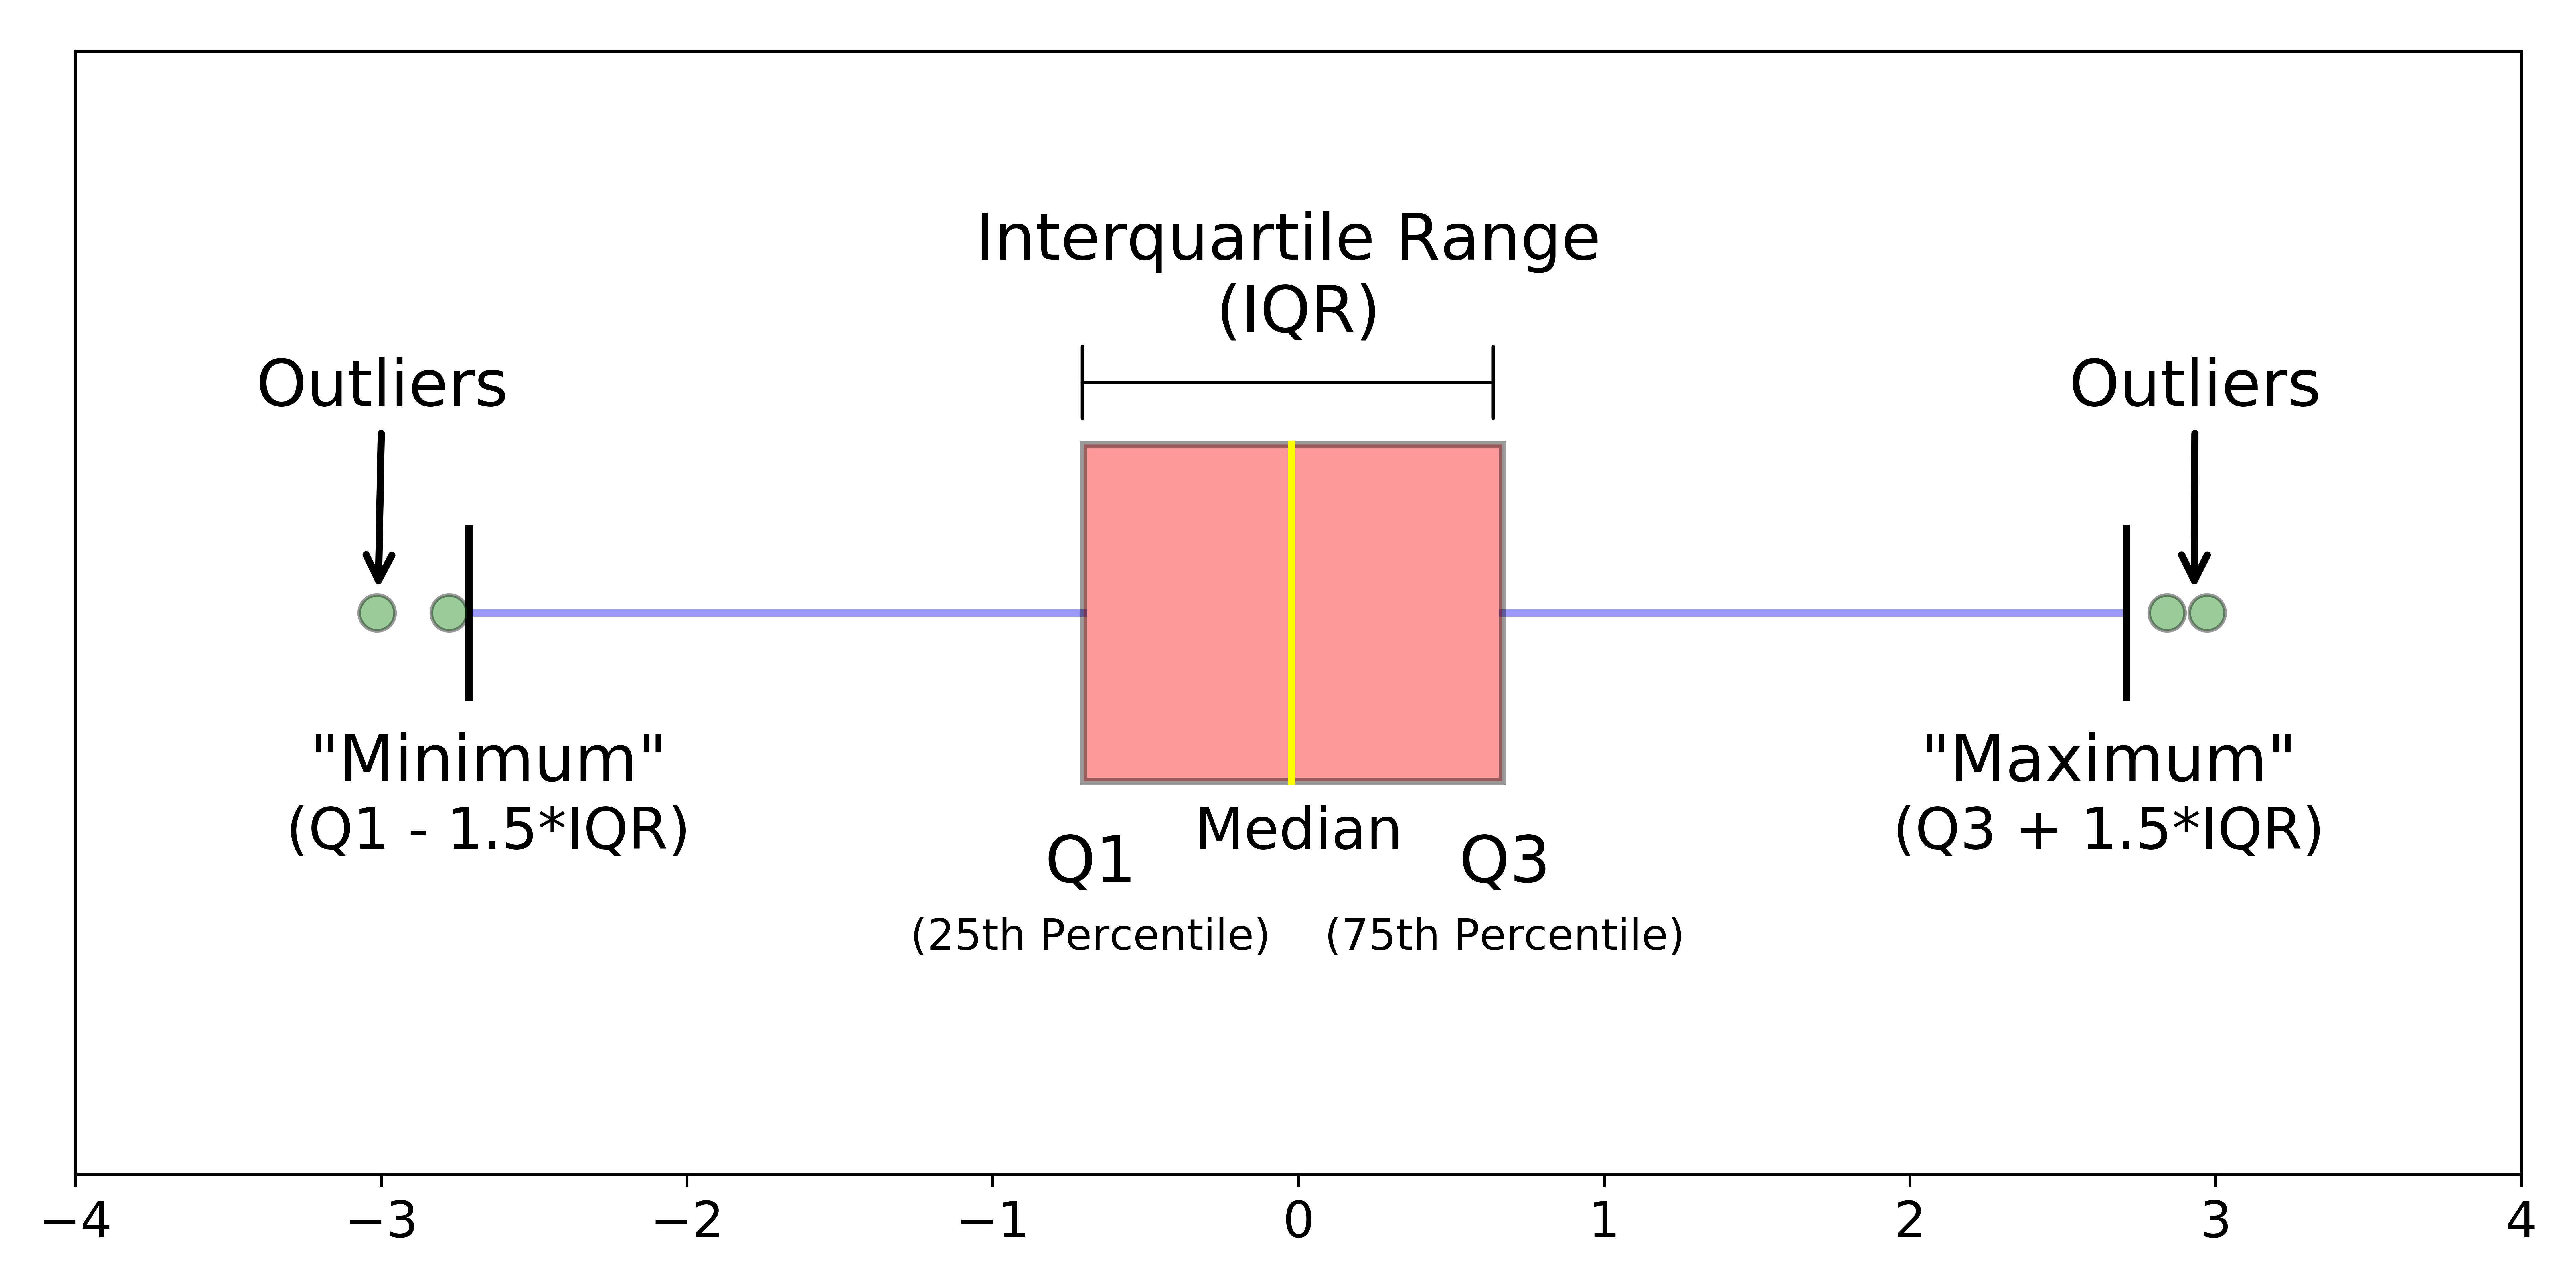
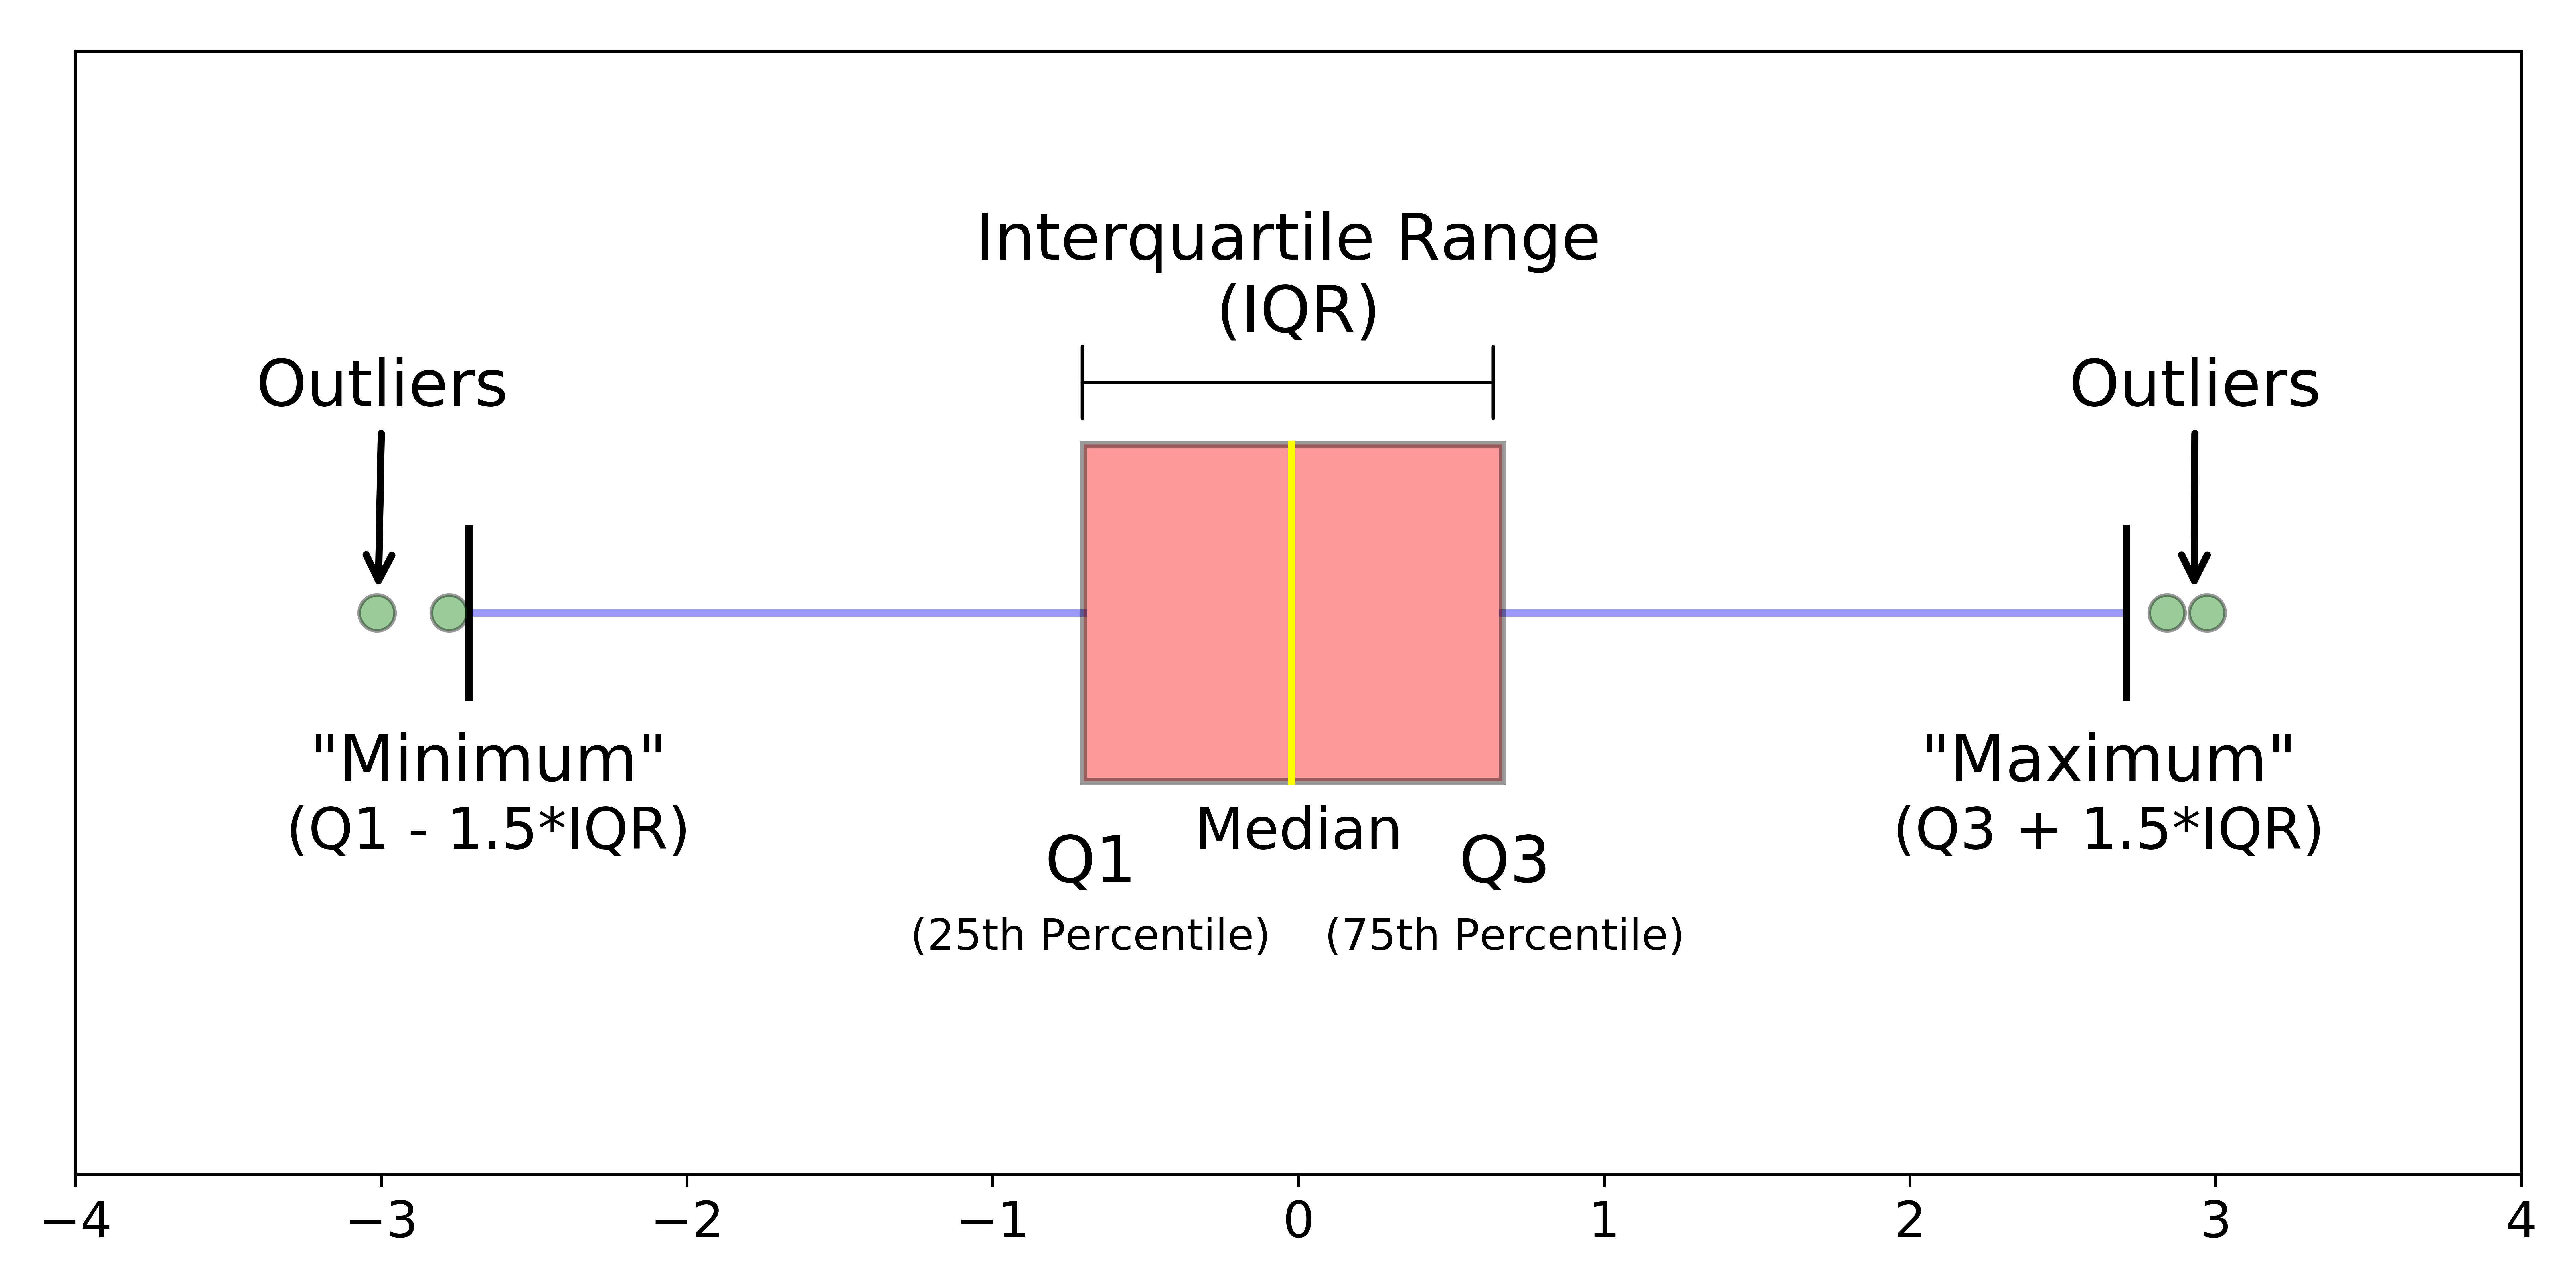

<Axes: >

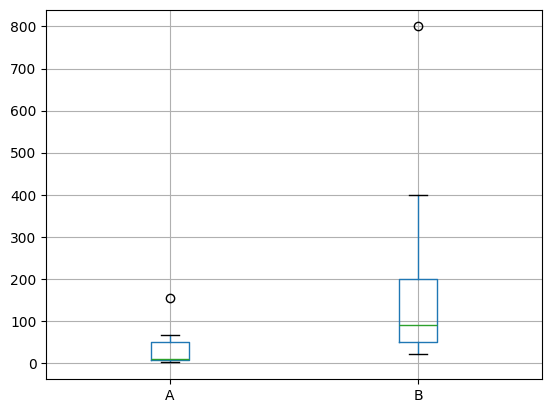

In [2]:
df = pd.DataFrame({
    'A': [1, 26, 3, 4, 52, 6, 7, 8, 9, 10, 50,67, 155],
    'B': [20, 30, 40, 50, 60, 70, 800, 90, 100, 110, 200, 400, 300]
})
df.boxplot()

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [15]:
df_trim = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
df_trim

,A,B
0,1,20
1,26,30
2,3,40
3,4,50
4,52,60
5,6,70
7,8,90
8,9,100
9,10,110
10,50,200


### Handling incorrect data

In [31]:
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['John', 'Jane', 'Bob', 'Alice', 'David'],
    'age': [25, -31, 42, 19, 37],
    'gender': ['M', 'F', 'M', 'F', 'Z'],
    'income': [50000, 70000, np.nan, '30000', 60000]
})
data

,id,name,age,gender,income
0,1,John,25,M,50000
1,2,Jane,-31,F,70000
2,3,Bob,42,M,NaN
3,4,Alice,19,F,30000
4,5,David,37,Z,60000


In [32]:
# Identufy Incorrect Date
incorrect_age = data[(data['age'] <= 0) | (data['age'] > 100)]
incorrect_gender = data[~data['gender'].isin(['M', 'F'])]

In [34]:
data.loc[incorrect_age.index, 'age'] = np.nan

In [35]:
data

,id,name,age,gender,income
0,1,John,25.0,M,50000
1,2,Jane,NaN,F,70000
2,3,Bob,42.0,M,NaN
3,4,Alice,19.0,F,30000
4,5,David,37.0,Z,60000


In [27]:
data = data.drop(incorrect_age.index)

In [28]:
data =data.drop(incorrect_gender.index)

In [29]:
data

,id,name,age,gender,income
0,1,John,25,M,50000
2,3,Bob,42,M,NaN
3,4,Alice,19,F,30000


### Handling inconsistent data

In [37]:
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'country': ['USA', 'U.S.A.', 'United States', 'Canada', 'Mexico'],
    'date': ['2021-01-01', '01/01/2021', '2021-01-01', '2021-01-01', '01-01-2021']
})
data

,id,country,date
0,1,USA,2021-01-01
1,2,U.S.A.,01/01/2021
2,3,United States,2021-01-01
3,4,Canada,2021-01-01
4,5,Mexico,01-01-2021


In [38]:
# Define rules for resolving inconsistencies
country_codes = {
    'USA': 'US',
    'U.S.A.': 'US',
    'United States': 'US',
    'Canada': 'CA',
    'Mexico': 'MX'
}

In [39]:
# replace
data['country'].replace(country_codes)

0    US
1    US
2    US
3    CA
4    MX
Name: country, dtype: object

In [40]:
data['country'].apply(lambda x: country_codes.get(x,x))

0    US
1    US
2    US
3    CA
4    MX
Name: country, dtype: object